In [6]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import matplotlib
import pywt
import pandas as pd
from synthetic import create_concatenated_sines, create_mixed_sines

In [9]:
def get_fft_values(y_values, sampling_frequency):
    number_of_samples = len(y_values)
    
    # Make frequency vector (up to Nyquist frequency)
    frequency_array = np.linspace(0.0, 1.0/(2.0*(1/sampling_frequency)), number_of_samples//2)
    # Calculate FFT
    fft_values_ = fft(y_values)
    # Get absolute values of FFT (magnitude, disconsider phase here)
    fft_values = 2.0/number_of_samples * np.abs(fft_values_[0:number_of_samples//2])
    return frequency_array, fft_values

In [4]:
frequencies = [4, 30, 60, 90]
total_time = 1
number_of_samples = 100000


In [13]:
time_array1, mixed_signal = create_mixed_sines(frequencies, total_time, number_of_samples)
time_array2, composite_signal = create_concatenated_sines(frequencies, total_time, number_of_samples)

In [14]:
period = total_time / number_of_samples # sampling period
sampling_frequency = 1/period # sampling frequency

frequency_array1, fft_values1 = get_fft_values(mixed_signal, sampling_frequency)
frequency_array2, fft_values2 = get_fft_values(composite_signal, sampling_frequency)

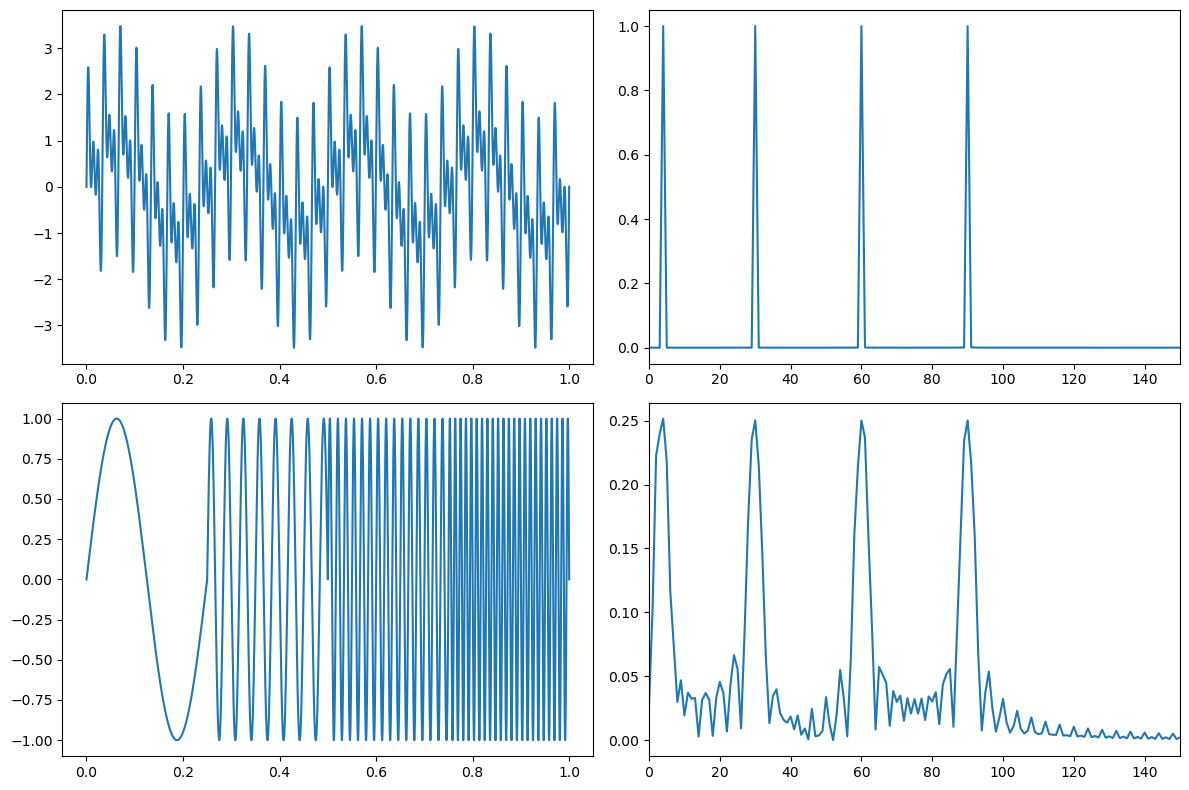

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0,0].plot(time_array1, mixed_signal)
ax[1,0].plot(time_array1, composite_signal)
ax[0,1].plot(frequency_array1, fft_values1)
ax[1,1].plot(frequency_array2, fft_values2)
ax[0,1].set_xlim(0, 150)
ax[1,1].set_xlim(0, 150)

plt.tight_layout()
plt.show()

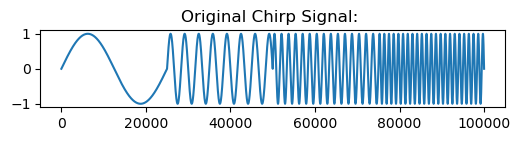

(50004,) (50004,)
(25006,) (25006,)
(12507,) (12507,)
(6258,) (6258,)
(3133,) (3133,)


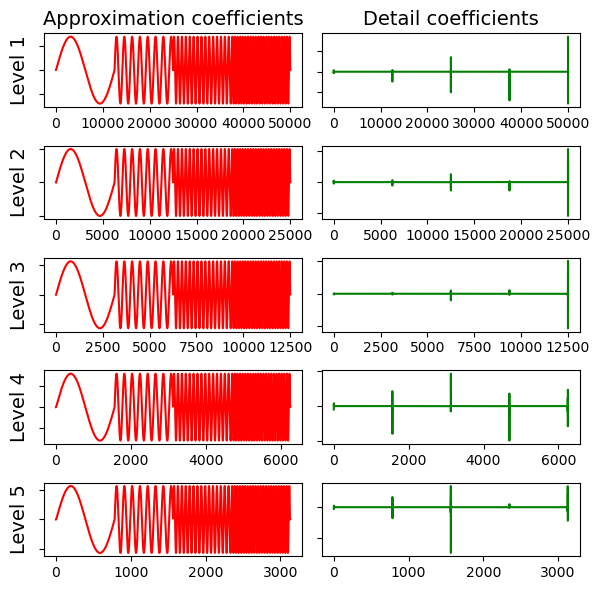

In [18]:
x = np.linspace(0, 1, num=2048)
chirp_signal = composite_signal#np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    print(data.shape, coeff_d.shape)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()